# FLUID MECHANICS ASSIGNMENT 1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## **Q1)**
 The velocity field is as follows  $ \vec{v} = u \hat{i} + v\hat{j} $ <br>
 $ r < 1 = >  \vec{v} = \vec{0}$ <br>
 When r $\geqslant$ 1
 $ u = \dfrac{(x^{2} - y^{2} - 1)(x^2 - y^2) + 4x^{2}y^{2}}{r^4} $<br>
 $ v = \dfrac{-2xy}{r^4} $ <br>
 where r is $\sqrt{x^2 + y^2}$


In [3]:
def vel(r,t):
    x,y=r
    d=np.sqrt(x**2+y**2)
    if(d>=1):
        u=((x**2 - y**2 -1)*(x**2 - y**2) + 4*x*x*y*y )/d**4
        v=-2*x*y/d**4
    else:
        u=0
        v=0
    return u,v
#we are defining a python function that returns velocity vector as a postion of time and space 
#Vel_2 is a function for the sake of plotting reasons , to implement inequalities etc
def vel_2(r,t):
    x,y=r
    d=np.sqrt(x**2+y**2)
    u=((x**2 - y**2 -1)*(x**2 - y**2) + 4*x*x*y*y )/d**4
    v=-2*x*y/d**4
    cond = d < 1
    u[cond]=0
    v[cond]=0
    return np.array([u,v])
     

now we have to plot the vector field in $[-3,3]$ X $[-3,3]$.Since the velocity field is time independent we can plot the vector plot for any time say t =0


Text(0.5, 1.0, 'Velocity field')

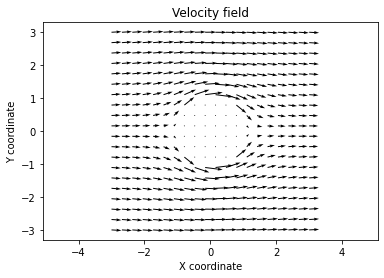

In [4]:
X,Y= np.mgrid[-3:3:20j,-3:3:20j] # creating a mesh
U,V=vel_2((X,Y),0) #time is fixed to any thing of my choice as field is time invariant
#U=np.ones_like(X)
#V=np.ones_like(X)
#for i in range(20):
#    for j in range(20):
#        x=X[i][j]
#        y=Y[i][j]
#        r=x,y
#       u,v=vel(r,0)
#        U[i][j]=u  # manually entering the velocity values of each mesh point
#        V[i][j]=v
plt.clf()
plt.quiver(X,Y,U,V)
plt.axis('equal') 
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Velocity field")

So above is what our vector field looks like

Now we have to analyse pathlines streamlines(at time t=0 ) and streaklines arising from 10 points on the line x= -2

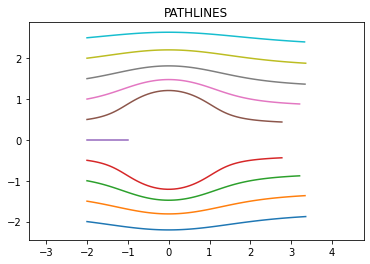

In [38]:
# We are plotting a set of pathlines from t=0 to t  =5
times = np.linspace(0, 5, 100)
for i in range(10):
    ic = np.array([-2, -2 + i*0.5])
    sol = odeint(vel, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)
plt.axis('equal')
plt.title("PATHLINES")
plt.show()


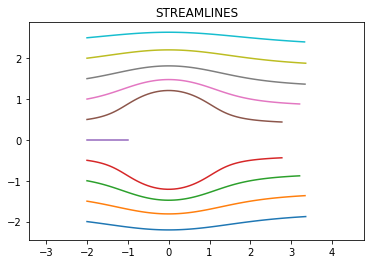

In [40]:
#WE are going to plot streamlines arising from different points at time t
def vel_at_t0(r,t):
    return vel(r,0) #this is a genral step where we are fixing field at time t = 0

times = np.linspace(0, 5, 100)
for i in range(10):
    ic = np.array([-2, -2 + i*0.5])
    sol = odeint(vel_at_t0, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)
plt.axis('equal')
plt.title("STREAMLINES")
plt.show()

Now streaklines from time 0 to 5 seconds

Text(0.5, 1.0, 'STREAKLINES')

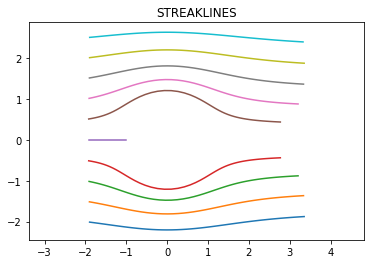

In [44]:
for i in range(10): #streakline repetition loop
    ic = np.array([-2, -2+i*0.5])
    dt = 0.1
    n = 50 #n*dt = T= 5seconds
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel, ic, [start, T]) #streakline generator
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
plt.axis('equal')
plt.title("STREAKLINES")

**Final Conclusion** : 
this flow looks like a steady flow around a stationary circle of radius 1 and its *steady* because all the plots streamline streakline and pathline appear identical and moreover the velocity field is time indepemdent

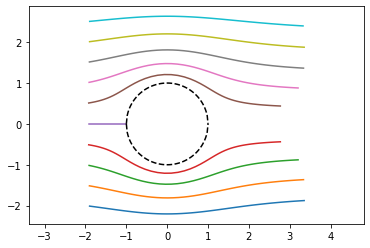

In [47]:
for i in range(10): #streakline repetition loop
    ic = np.array([-2, -2+i*0.5])
    dt = 0.1
    n = 50 #n*dt = T= 5seconds
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel, ic, [start, T]) #streakline generator
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
plt.axis('equal')
a = np.linspace(-1,1,100)
b = np.sqrt(1-a**2)
plt.plot(a,b,'--k')
plt.plot(a,-b,'--k')

an illustraion of the circle around which the fluid flows

## **Q2)**
 The velocity field is as follows  $ \vec{v} = u \hat{i} + v\hat{j} $ <br>
 $ u = \dfrac{y^2 - {x'}^2}{r^4} $ <br>
 $ v = -2{x'}y/r^4$
 $$x' = x+t$$ $$ r =\sqrt{x'^2 + y^2}$$

In [4]:
def vel(r,t):
    x_,y=r
    x=x_ +t
    d=np.sqrt(x**2+y**2)
    u = (y**2 - x**2)/d**4
    v = -2*x*y/d**4
    return u,v
#we are defining a python function that returns velocity vector as a postion of time and space 
def velp(r,t): #this is a function for the sake of vector field plotting to remove the central anomalities due to velocity shootup at origin
    x_,y=r
    x=x_+t
    d=np.sqrt(x**2+y**2)
    cond=d<1
    u = (y**2 - x**2)/d**4
    v = -2*x*y/d**4
    u[cond]=0
    v[cond]=0
    return u,v
    

Lets plot the velocity fields at times 0 1 2 3 4 and 5 seconds in $[-3,3]$ **X** $[-3,3]$

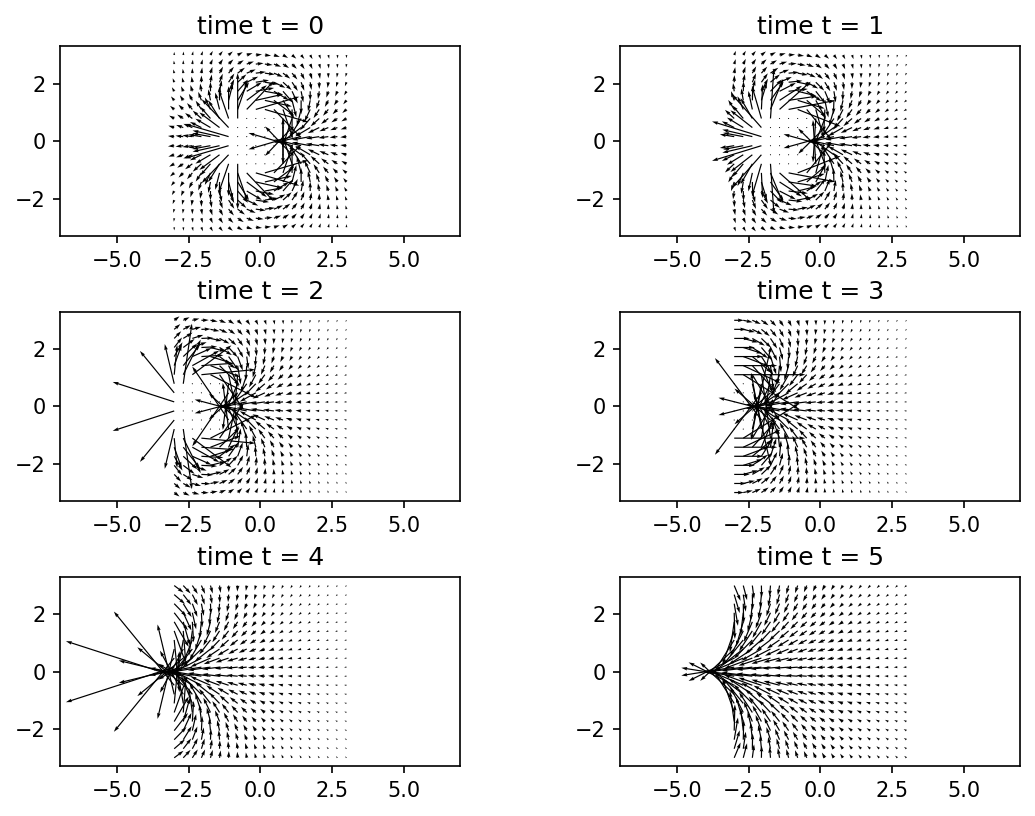

In [5]:
x,y=np.mgrid[-3:3:20j,-3:3:20j]
plt.figure(figsize=(8,6),dpi=150)

plt.subplot(3,2,1)
u,v=velp([x,y],0)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.title("time t = 0")

plt.subplot(3,2,2)
u,v=velp([x,y],1)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.title("time t = 1")

plt.subplot(3,2,3)
u,v=velp([x,y],2)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.title("time t = 2")

plt.subplot(3,2,4)
u,v=velp([x,y],3)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.title("time t = 3")

plt.subplot(3,2,5)
u,v=velp([x,y],4)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.title("time t = 4")

plt.subplot(3,2,6)
u,v=velp([x,y],5)
plt.quiver(x,y,u,v)
plt.axis('equal')
plt.title("time t = 5")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

Now we are done with the vector plots and now lets consider pathlines and streaklines for 6 seconds

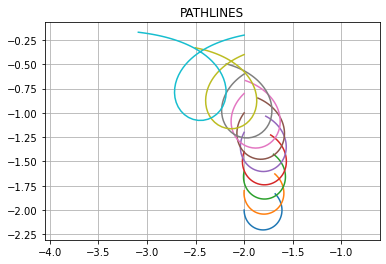

In [6]:
# We are plotting a set of pathlines from t=0 to t  =6
times = np.linspace(0, 6, 100)
for i in range(10):
    ic = np.array([-2, -2 + i*0.2])
    sol = odeint(vel, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)
plt.axis('equal')
plt.grid()
plt.title("PATHLINES")
plt.show()


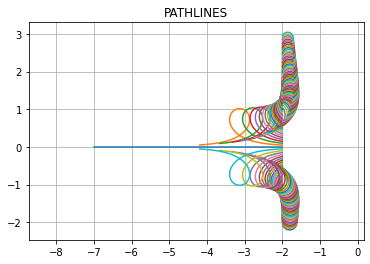

In [7]:
# We are plotting a set of pathlines from t=0 to t  =6 but in an epic manner
times = np.linspace(0, 6, 100)
for i in range(100):
    ic = np.array([-2, -2 + i*0.05])
    sol = odeint(vel, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)
plt.axis('equal')
plt.grid()
plt.title("PATHLINES")
plt.show()


the above is a more intense and grand picture of pathlines . Now lets get to see streaklines for the same timespan arising from different points on the line x =- 2

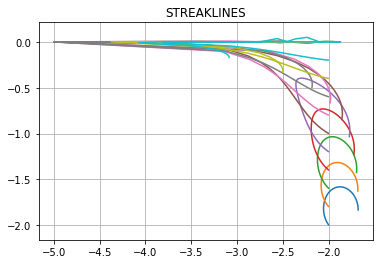

In [73]:
for i in range(10): #streakline repetition loop
    ic = np.array([-2, -2+i*0.2])
    dt = 0.1
    n = 60 #n*dt = T= 6seconds
    T = n*dt
    sx, sy = [], []
    for i in range(n):
        start = i*dt
        res = odeint(vel, ic, [start, T]) #streakline generator
        sx.append(res[1,0])
        sy.append(res[1,1])
    plt.plot(sx, sy)
plt.axis('equal')
plt.grid()
plt.title("STREAKLINES")
plt.show()

Streaklines are a bit messier , but its not surprising the given velocity field. Now lets move on to the good old streamlines

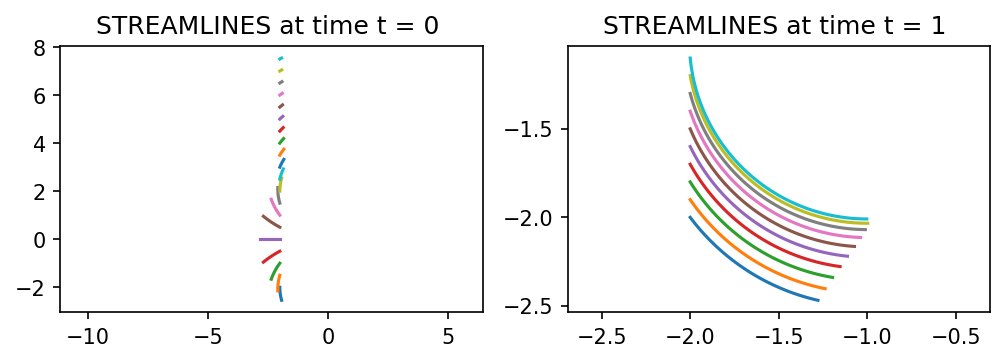

In [48]:
#WE are going to plot streamlines arising from different points at time 0 and 1
plt.figure(figsize=(8,8),dpi=150)
plt.subplot(3,2,1)
def vel_at_t0(r,t):
    x_,y=r
    x=x_ +0
    d=np.sqrt(x**2+y**2)
    u = (y**2 - x**2)/d**4
    v = -2*x*y/d**4
    return u,v #this is a genral step where we are fixing field at time t = 0

times = np.linspace(0, 5, 100)
for i in range(20):
    ic = np.array([-2, -2 + i*0.5])
    sol = odeint(vel_at_t0, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)
plt.axis('equal')
plt.title("STREAMLINES at time t = 0 ")


plt.subplot(3,2,2)
def vel_at_t0(r,t):
    x_,y=r
    x=x_ +1
    d=np.sqrt(x**2+y**2)
    u = (y**2 - x**2)/d**4
    v = -2*x*y/d**4
    return u,v #this is a genral step where we are fixing field at time t = 1

times = np.linspace(0, 5, 100)
for i in range(10):
    ic = np.array([-2, -2 + i*0.1])
    sol = odeint(vel_at_t0, ic, times)
    sx, sy = sol.T
    plt.plot(sx, sy)

plt.axis('equal')
plt.title("STREAMLINES at time t = 1 ")

plt.show()



**Final Conclusion** : this flow is tbh a little messed up but it looks like it forms some sort of a vortex